In [ ]:
!pip install kaggle


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset"

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:22<00:00, 19.8MB/s]
100% 2.70G/2.70G [02:22<00:00, 20.4MB/s]


In [ ]:
!unzip '/content/new-plant-diseases-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam

In [ ]:
image_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [ ]:
train_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = "/content/test"

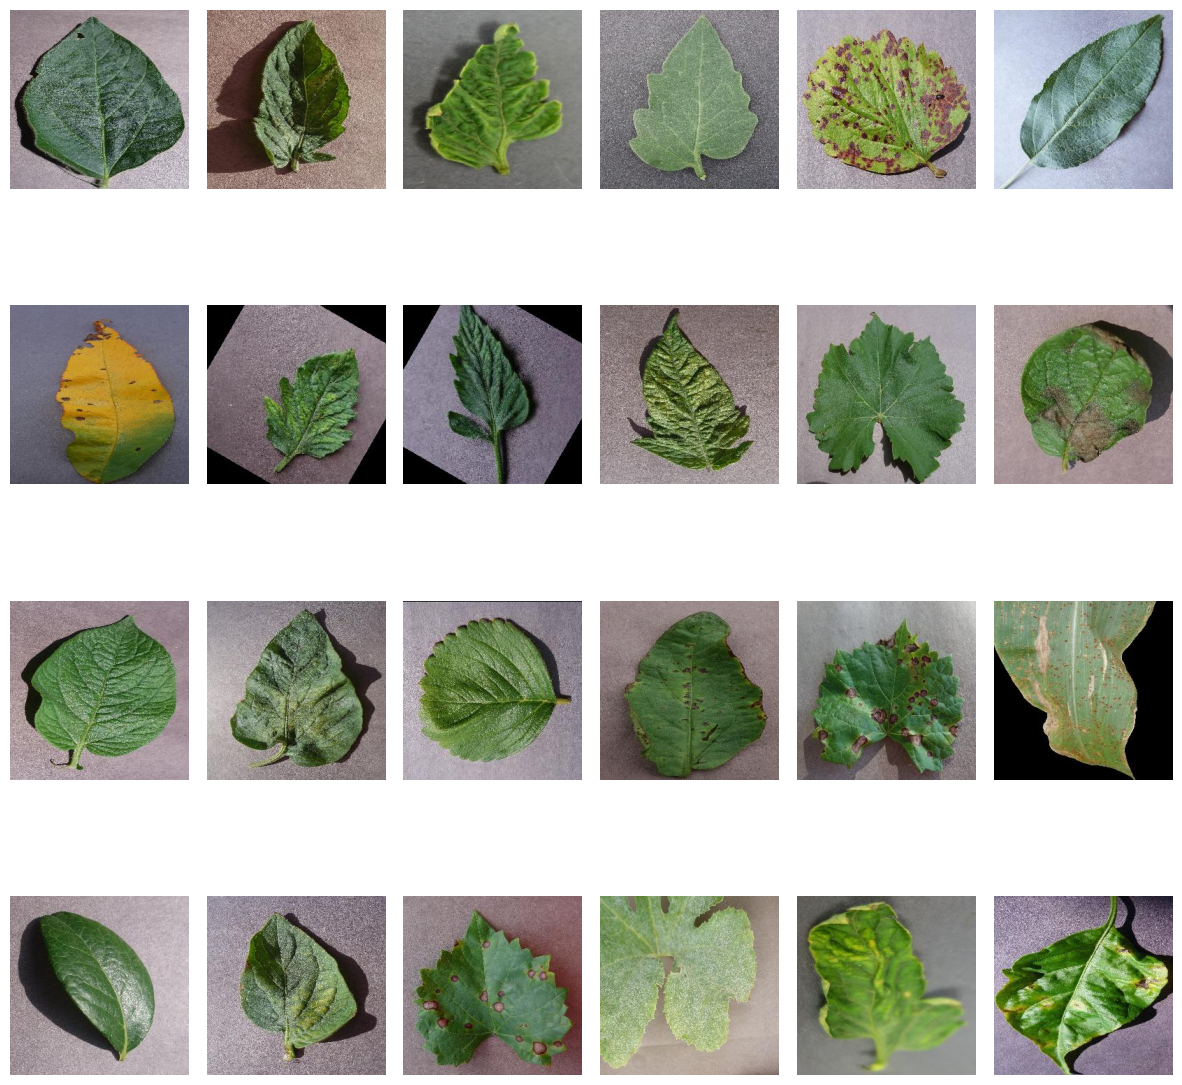

In [ ]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
class_names = os.listdir(image_path)
print(class_names)

['Tomato___healthy', 'Raspberry___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Squash___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Apple_scab', 'Corn_(maize)___healthy', 'Potato___Late_blight', 'Strawberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Black_rot', 'Grape___Esca_(Black_Measles)', 'Cherry_(including_sour)___healthy', 'Tomato___Target_Spot', 'Tomato___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Grape___Black_rot', 'Tomato___Early_blight', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Blueberry___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_mosaic_virus', 'Grape___healthy', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___healthy', 'Pota

In [ ]:
print("Number of classes : {}".format(len(class_names)))


Number of classes : 38


In [ ]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(image_path+"/"+class_name))

images_each_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])

In [ ]:
images_each_class

Class Name  Number of Images
0                                    Tomato___healthy              1926
1                                 Raspberry___healthy              1781
2                         Corn_(maize)___Common_rust_              1907
3                                Tomato___Late_blight              1851
4                                  Tomato___Leaf_Mold              1882
5                             Squash___Powdery_mildew              1736
6                 Corn_(maize)___Northern_Leaf_Blight              1908
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...              1642
8                                  Apple___Apple_scab              2016
9                              Corn_(maize)___healthy              1859
10                               Potato___Late_blight              1939
11                               Strawberry___healthy              1824
12           Cherry_(including_sour)___Powdery_mildew              1683
13                           Strawberry___Leaf_scorch              1774
14           Orange___Haunglongbing_(Citrus_greening)              2010
15                                  Apple___Black_rot              1987
16                       Grape___Esca_(Black_Measles)              1920
17                  Cherry_(including_sour)___healthy              1826
18                               Tomato___Target_Spot              1827
19                            Tomato___Bacterial_spot              1702
20                      Pepper,_bell___Bacterial_spot              1913
21                                  Grape___Black_rot              1888
22                              Tomato___Early_blight              1920
23                             Peach___Bacterial_spot              1838
24                           Apple___Cedar_apple_rust              1760
25      Tomato___Spider_mites Two-spotted_spider_mite              1741
26             Tomato___Tomato_Yellow_Leaf_Curl_Virus              1961
27                                Blueberry___healthy              1816
28         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)              1722
29                       Tomato___Tomato_mosaic_virus              1790
30                                    Grape___healthy              1692
31                        Tomato___Septoria_leaf_spot              1745
32                             Pepper,_bell___healthy              1988
33                              Potato___Early_blight              1939
34                                   Potato___healthy              1824
35                                    Peach___healthy              1728
36                                    Apple___healthy              2008
37                                  Soybean___healthy              2022

<ipython-input-16-5265a1f170c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")


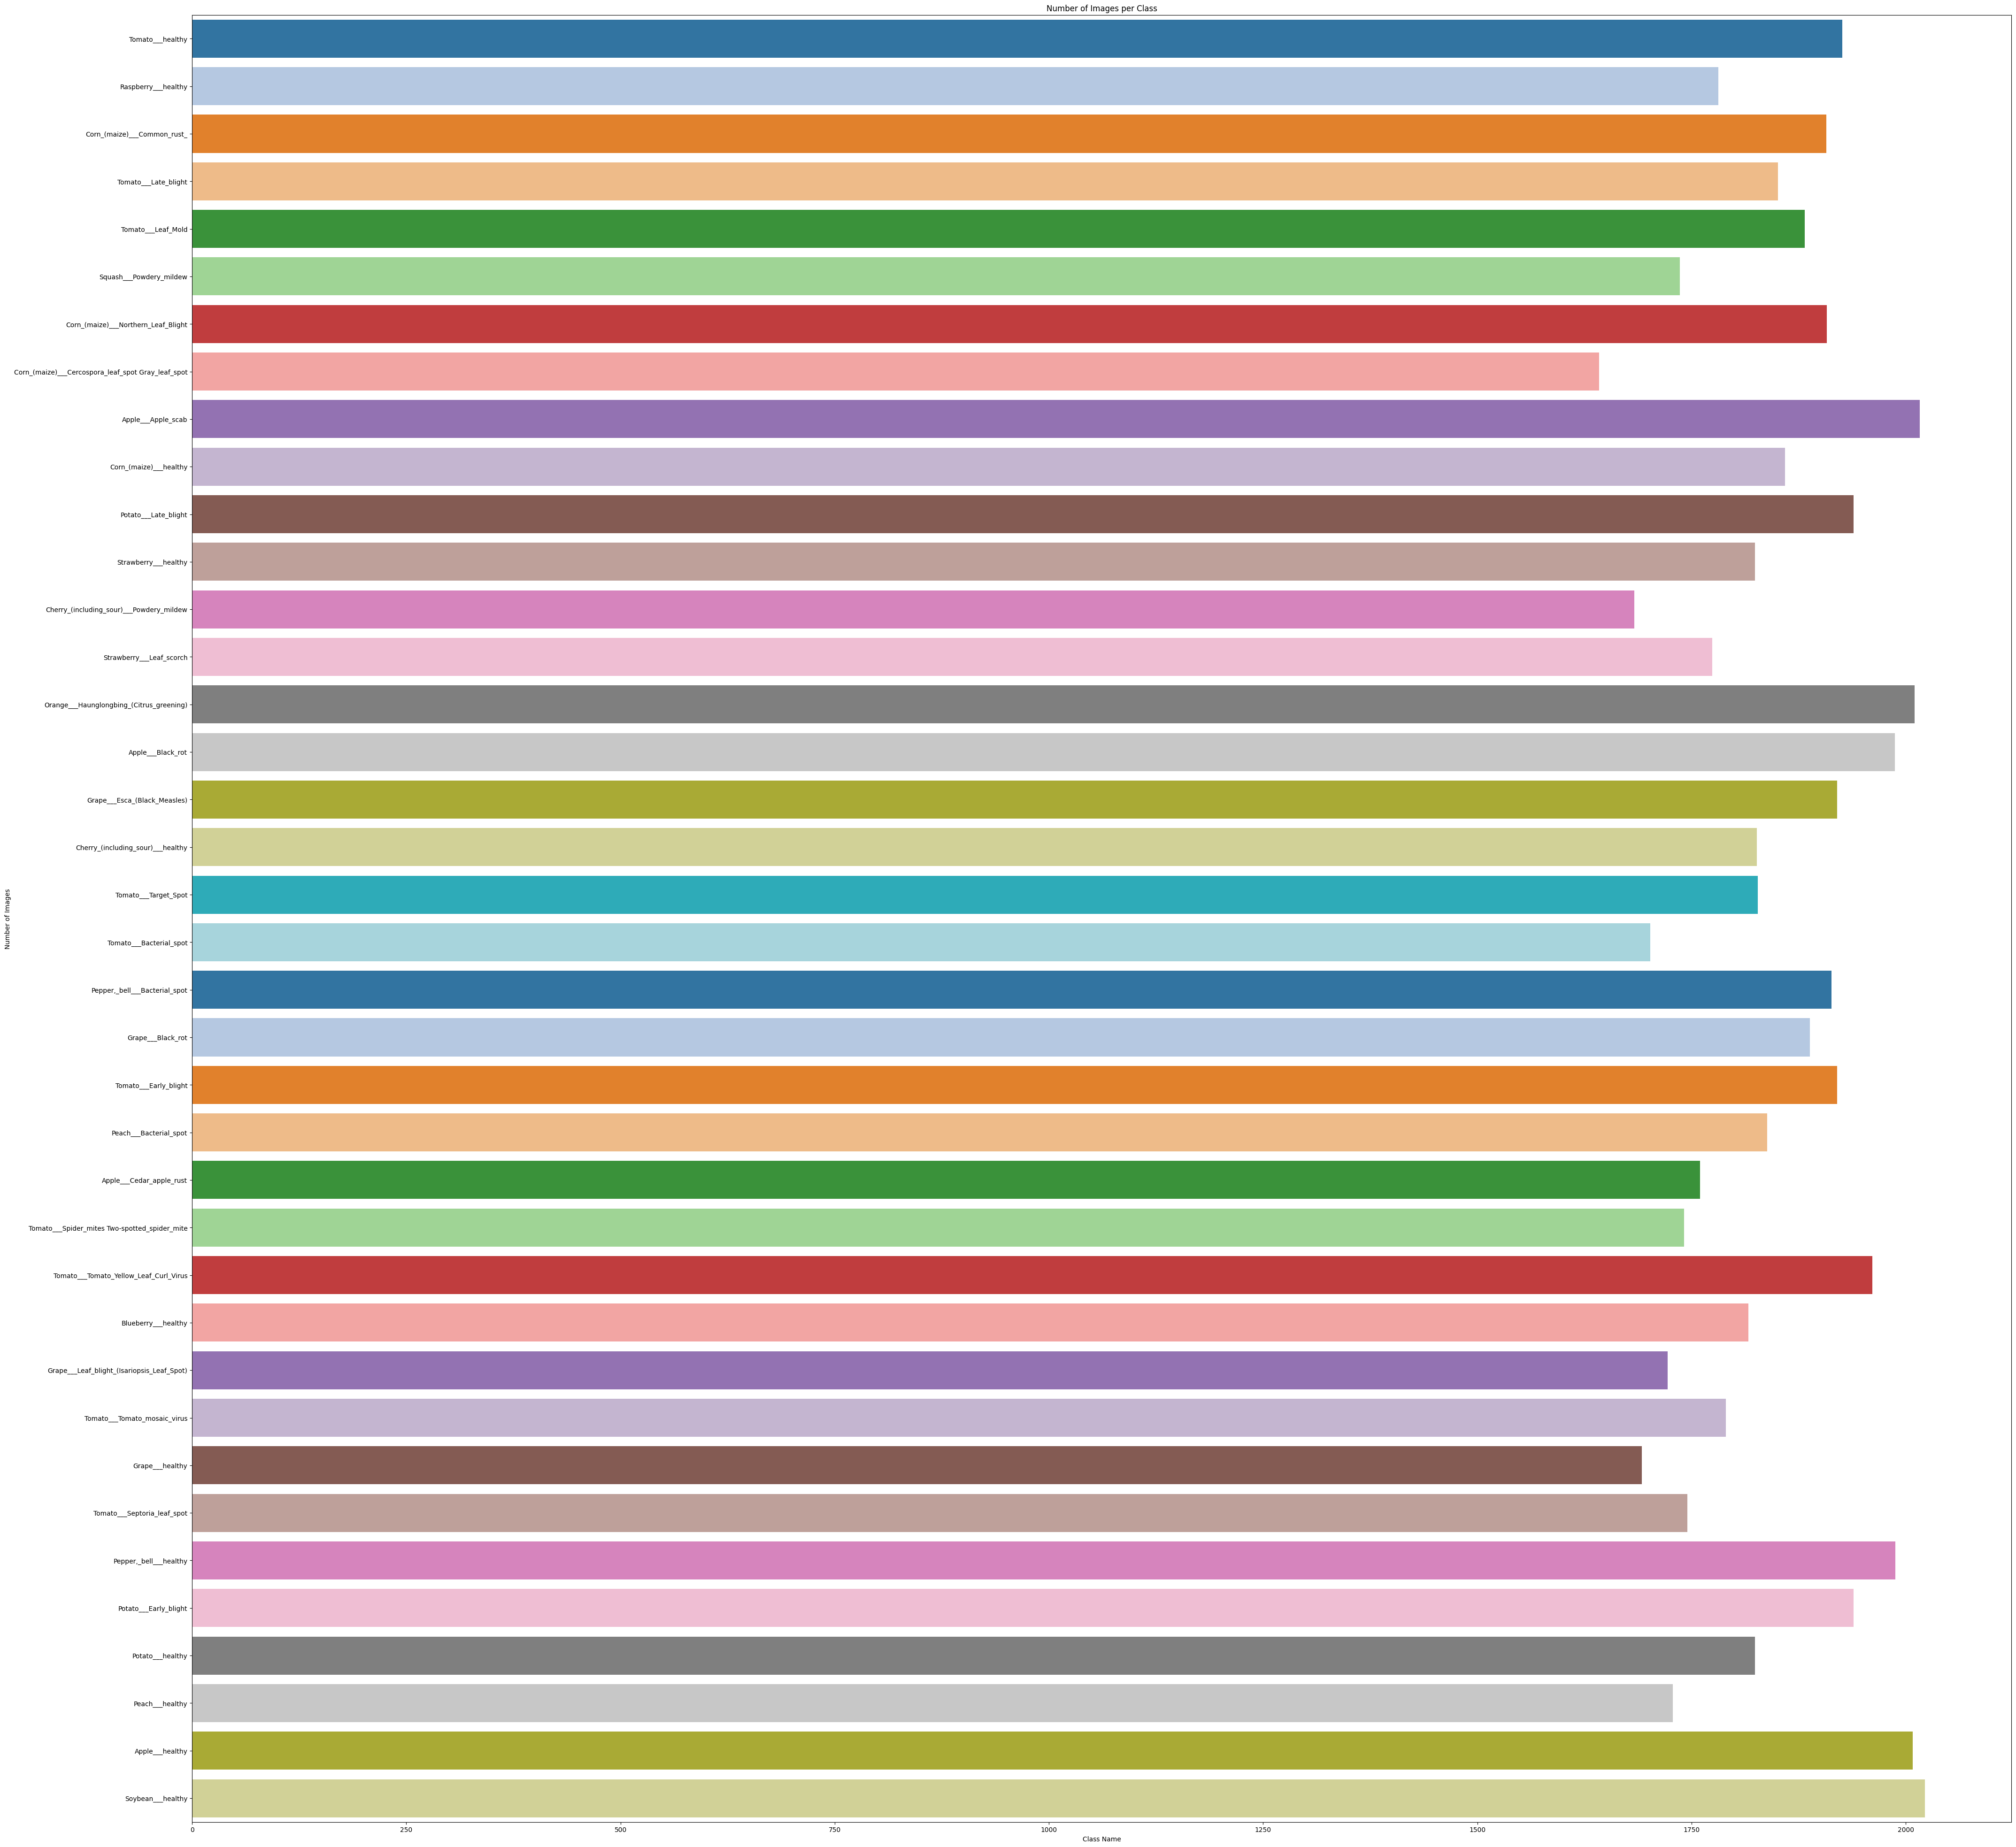

In [ ]:
plt.figure(figsize=(50,50))
sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:

cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
cnn.compile(optimizer=Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 163s 67ms/step - accuracy: 0.3981 - loss: 2.1362 - val_accuracy: 0.8382 - val_loss: 0.5145
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 178s 61ms/step - accuracy: 0.8378 - loss: 0.5178 - val_accuracy: 0.9096 - val_loss: 0.2833
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.9075 - loss: 0.2945 - val_accuracy: 0.9247 - val_loss: 0.2340
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9366 - loss: 0.1960 - val_accuracy: 0.9356 - val_loss: 0.2111
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 196s 62ms/step - accuracy: 0.9517 - loss: 0.1514 - val_accuracy: 0.9423 - val_loss: 0.1847
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.9625 - loss: 0.1133 - val_accuracy: 0.9619 - val_loss: 0.1208
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.9720 - loss: 0.0856 - val_accuracy: 0.9298 - val_loss: 0.2405
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 

In [ ]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 57s 26ms/step - accuracy: 0.9798 - loss: 0.0600
Training accuracy: 0.981961727142334


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9564 - loss: 0.1531
Validation accuracy: 0.9578306674957275


In [ ]:
cnn.save('trained_plant_disease_model.keras')


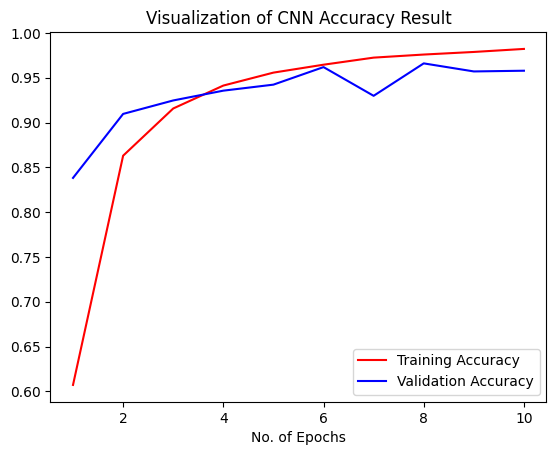

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of CNN Accuracy Result')
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.95      0.96       504
                                 Apple___Black_rot       0.96      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.98      0.95      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.82      0.99      0.89       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.90      0.

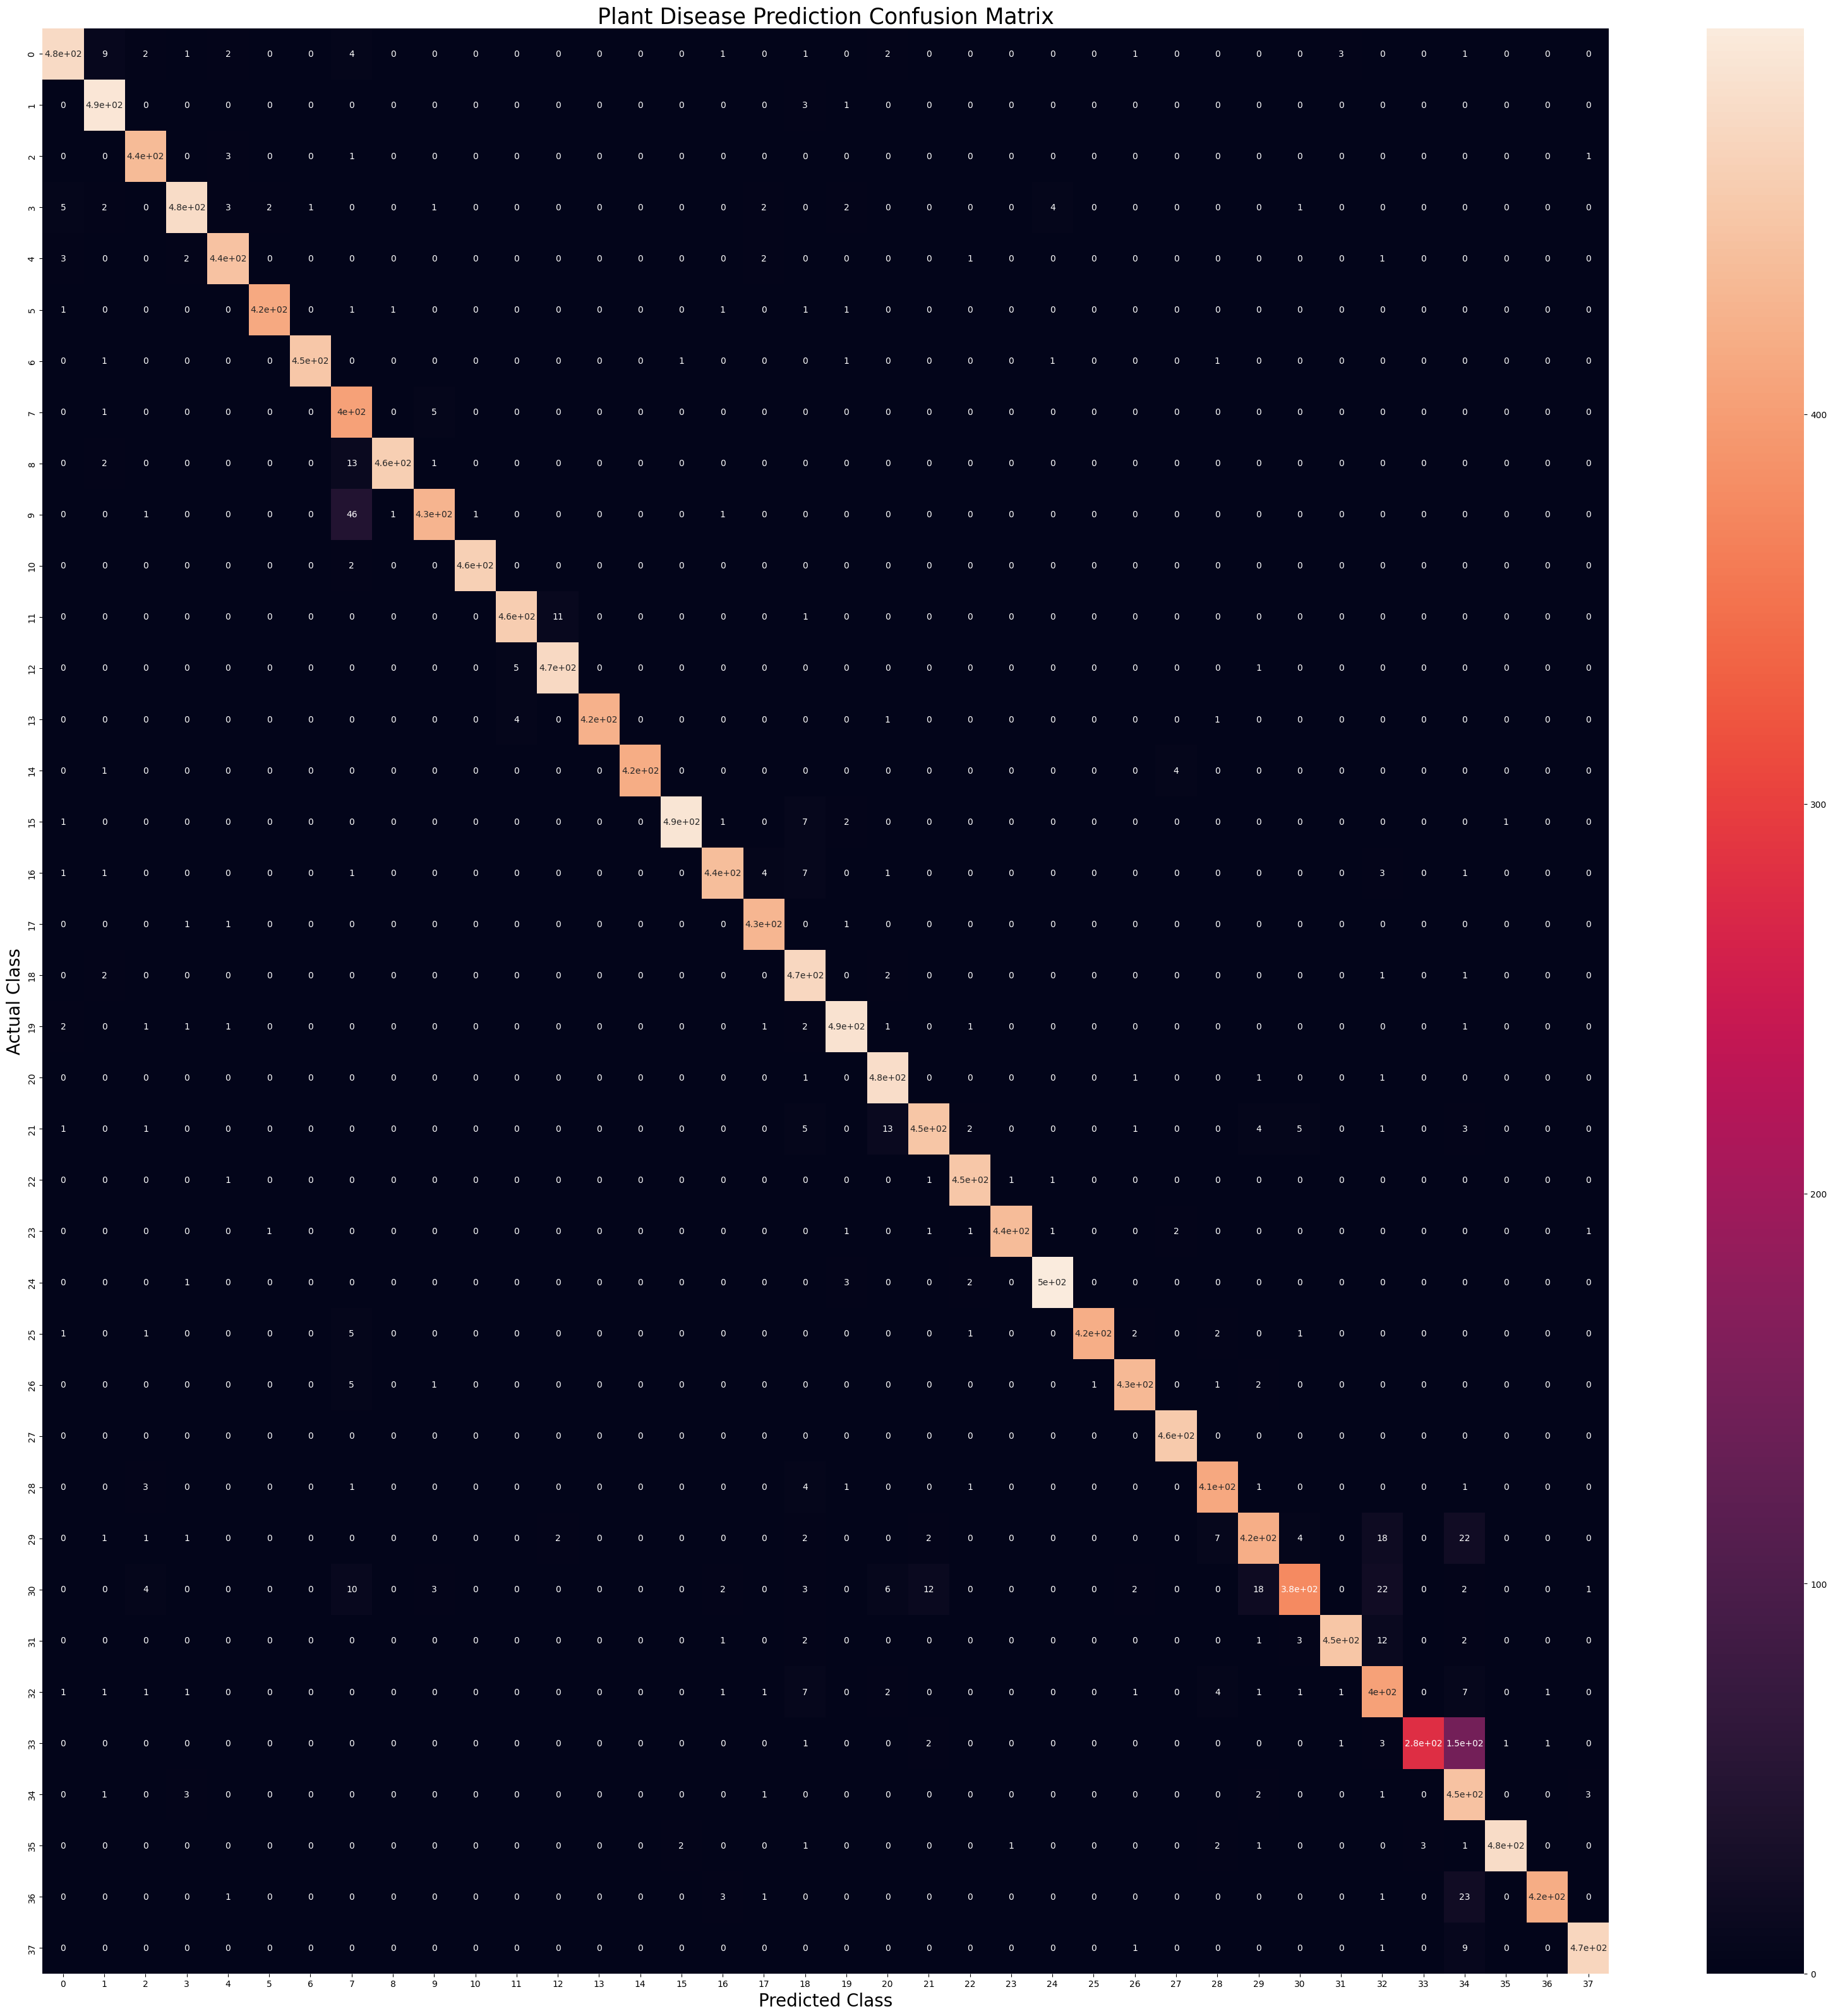

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
##Plotting the curves
# Get true labels and predicted probabilities
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

num_classes = len(class_name)
# True labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Convert true labels to one-hot encoding for multiclass ROC
Y_true_one_hot = label_binarize(Y_true, classes=range(num_classes))

# ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multiclass ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

# # Precision-Recall Curve for each class
# precision = dict()
# recall = dict()
# prc_auc = dict()
# for i in range(num_classes):
#     precision[i], recall[i], _ = precision_recall_curve(Y_true_one_hot[:, i], y_pred[:, i])
#     prc_auc[i] = auc(recall[i], precision[i])

# # Plot Precision-Recall curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(recall[i], precision[i], label=f"Class {class_name[i]} (AUC = {prc_auc[i]:.2f})")
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Multiclass Precision-Recall Curve')
# plt.legend(loc="lower left")
# plt.show()

# Print classification report for detailed metrics
print(classification_report(Y_true, predicted_categories, target_names=class_name))


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.95      0.96       504
                                 Apple___Black_rot       0.96      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.98      0.95      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.82      0.99      0.89       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Nor

In [ ]:
# # ROC Curve for each class with improved layout
# plt.figure(figsize=(12, 9))  # Increase figure size for more space

# for i in range(num_classes):
#     plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")

# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Multiclass ROC Curve', fontsize=16)

# # Adjust legend to prevent overlap
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)  # Puts legend outside the plot
# plt.tight_layout()  # Adjusts the plot to fit within the figure size
# plt.show()

# # Precision-Recall Curve for each class with improved layout
# plt.figure(figsize=(12, 9))  # Increase figure size for more space

# for i in range(num_classes):
#     plt.plot(recall[i], precision[i], label=f"Class {class_name[i]} (AUC = {prc_auc[i]:.2f})")

# plt.xlabel('Recall', fontsize=14)
# plt.ylabel('Precision', fontsize=14)
# plt.title('Multiclass Precision-Recall Curve', fontsize=16)

# # Adjust legend to prevent overlap
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)  # Puts legend outside the plot
# plt.tight_layout()  # Adjusts the plot to fit within the figure size
# plt.show()


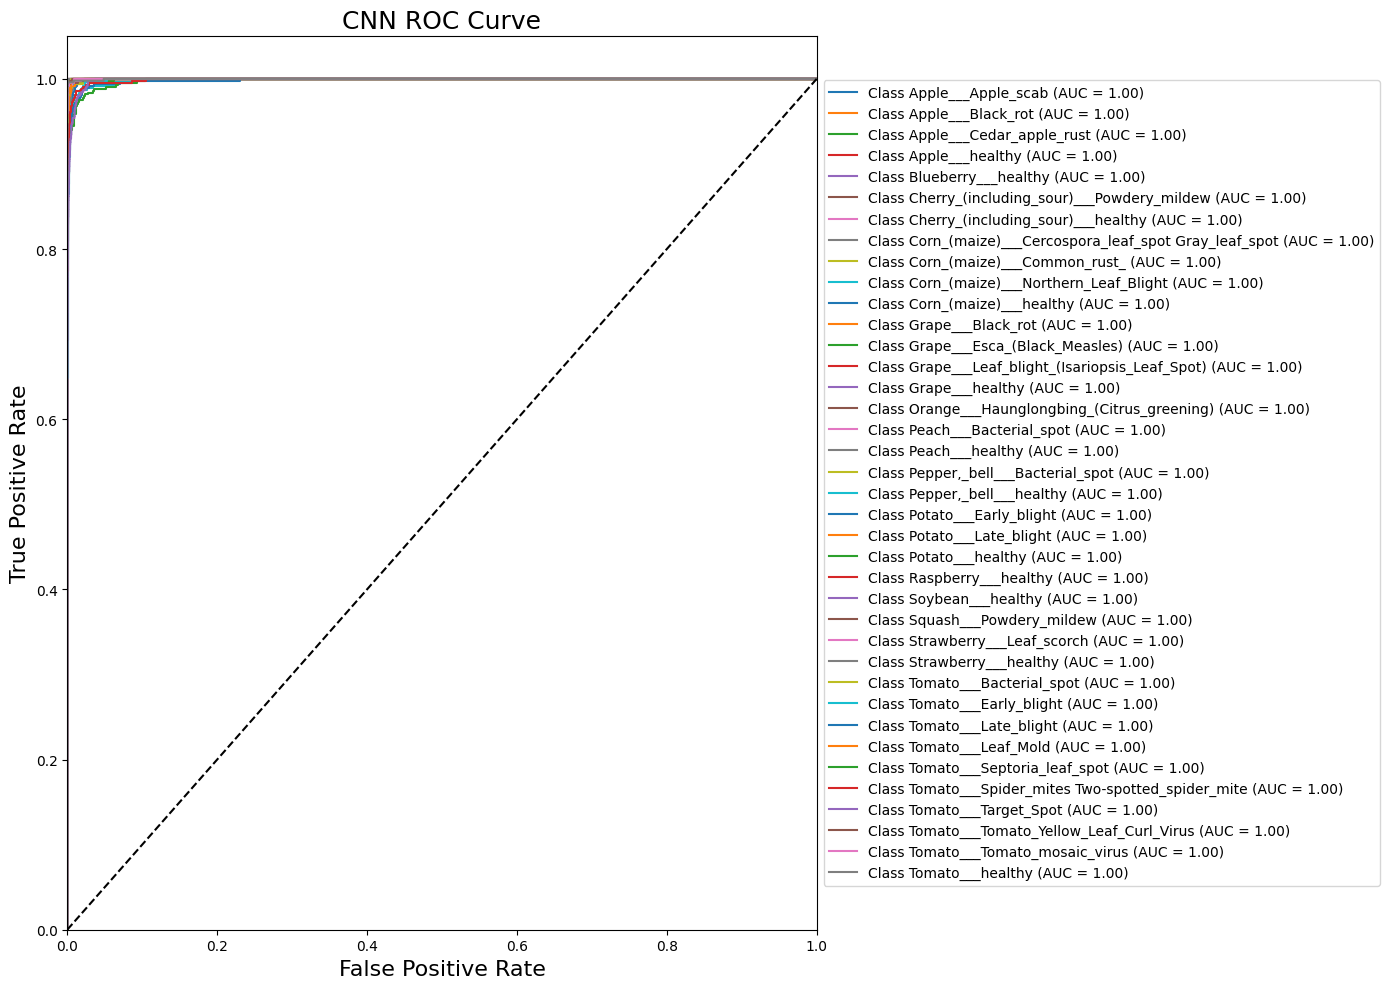

In [ ]:
# ROC Curve for each class with smaller legend text and larger plot
plt.figure(figsize=(14, 10))  # Increase figure size for more space

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('CNN ROC Curve', fontsize=18)

# Adjust legend to prevent overlap, with smaller text
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Smaller legend text
plt.tight_layout()  # Adjusts the plot to fit within the figure size
plt.show()




# Precision-Recall Curve for each class with smaller legend text and larger plot

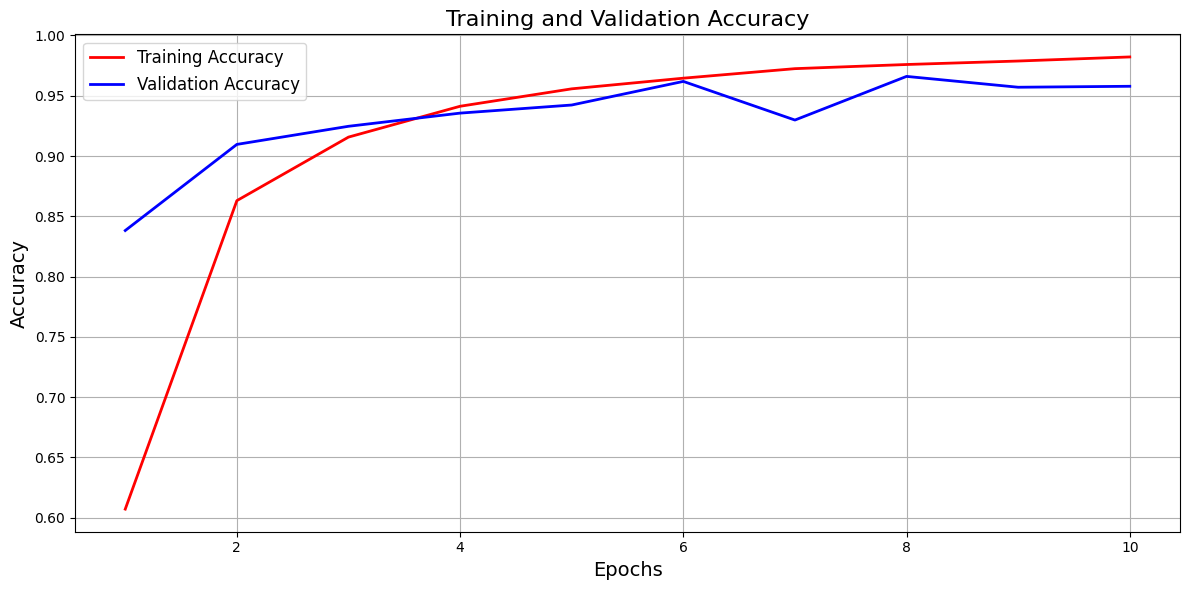

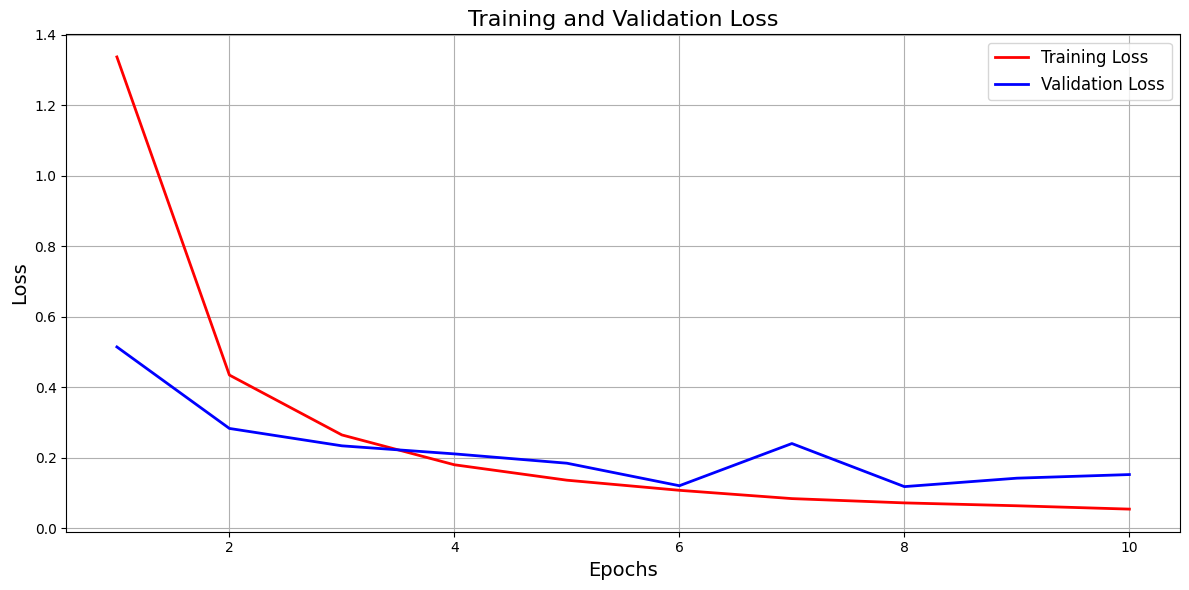

In [ ]:
# Assuming training_history contains 'accuracy', 'val_accuracy', 'loss', and 'val_loss'
epochs = range(1, len(training_history.history['accuracy']) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_history.history['accuracy'], 'r', label='Training Accuracy', linewidth=2)
plt.plot(epochs, training_history.history['val_accuracy'], 'b', label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_history.history['loss'], 'r', label='Training Loss', linewidth=2)
plt.plot(epochs, training_history.history['val_loss'], 'b', label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Unfreeze all layers for fine-tuning
for layer in cnn.layers:
    layer.trainable = True

# Recompile with a smaller learning rate for fine-tuning
cnn.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
fine_tune_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

# Evaluate fine-tuned model
fine_tune_train_loss, fine_tune_train_acc = cnn.evaluate(training_set)
fine_tune_val_loss, fine_tune_val_acc = cnn.evaluate(validation_set)
print(f"Fine-tuned Training Accuracy: {fine_tune_train_acc}")
print(f"Fine-tuned Validation Accuracy: {fine_tune_val_acc}")


Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 66ms/step - accuracy: 0.9939 - loss: 0.0166 - val_accuracy: 0.9832 - val_loss: 0.0646
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9989 - loss: 0.0044 - val_accuracy: 0.9841 - val_loss: 0.0655
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9837 - val_loss: 0.0712
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.9991 - loss: 0.0032 - val_accuracy: 0.9850 - val_loss: 0.0727
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9830 - val_loss: 0.0817
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step - accuracy: 0.9998 - loss: 4.7805e-04
550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9830 - loss: 0.0795
Fine-tuned Training Accuracy: 0.9998292922973633
Fine-tuned Validation Accuracy: 0.9829843044281006


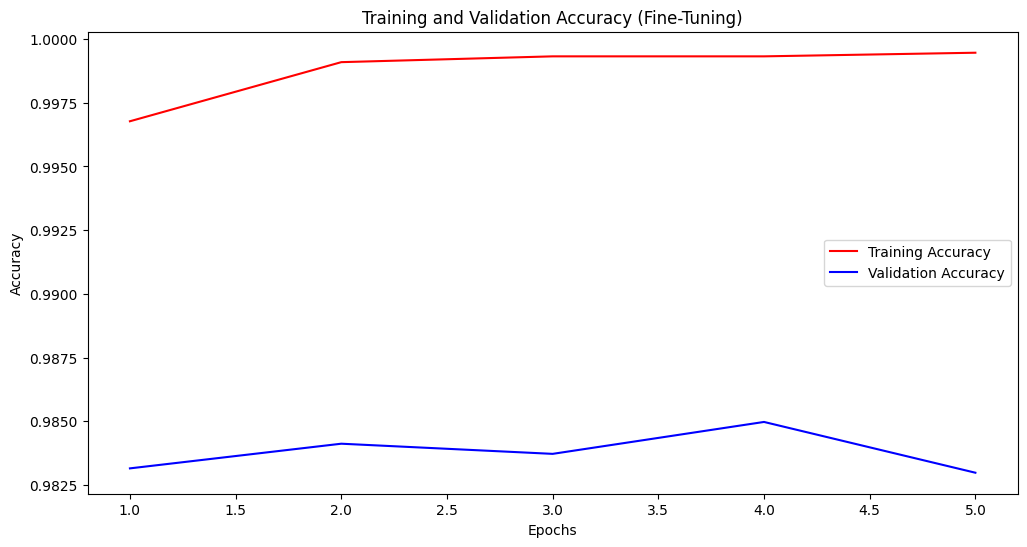

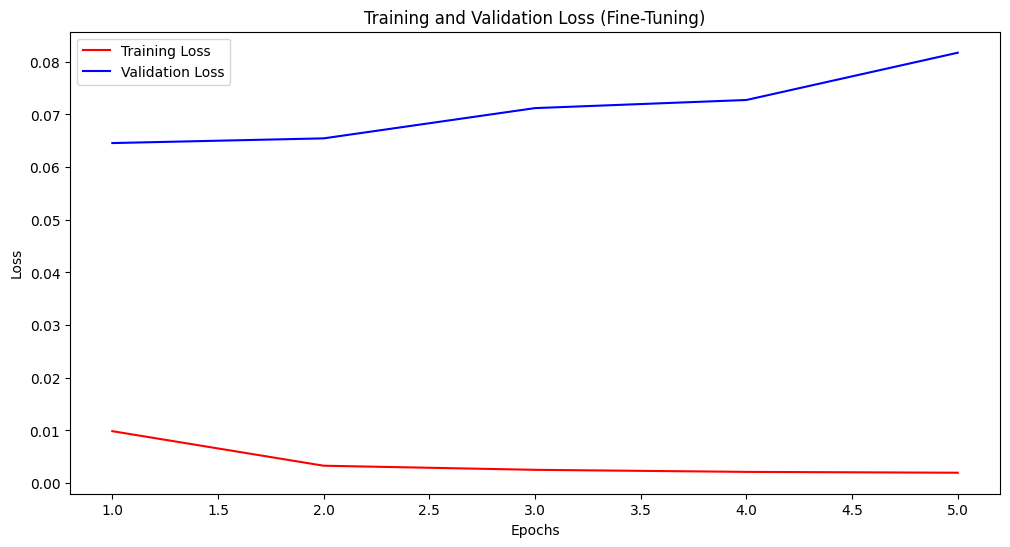

In [ ]:
# Extract accuracy and loss from the fine-tuning history
epochs_range = range(1, 6)  # 5 epochs of fine-tuning
acc = fine_tune_history.history['accuracy']
val_acc = fine_tune_history.history['val_accuracy']
loss = fine_tune_history.history['loss']
val_loss = fine_tune_history.history['val_loss']

# Plot fine-tuning accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Accuracy_CNN_Fine_Tuning',dpi=900)
plt.show()

# Plot fine-tuning loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss (Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss_CNN_Fine_Tuning',dpi=900)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

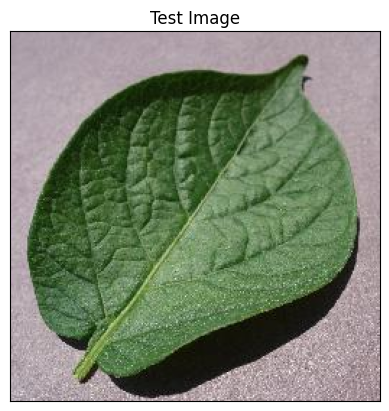

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/test/test/PotatoHealthy2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
print(predictions)

[[4.4930360e-16 7.7193916e-15 3.5822388e-18 3.8980767e-11 8.0703289e-18
  3.1145303e-14 2.5340932e-12 2.7752498e-22 3.6181566e-23 1.5533749e-22
  6.8640683e-22 9.1956602e-21 2.3433238e-22 7.6398859e-22 1.4699516e-18
  1.4129817e-17 2.4794886e-19 1.0513804e-19 3.9153052e-18 2.8317680e-11
  7.1973499e-15 1.8559399e-11 1.0000000e+00 3.5954573e-14 1.6647028e-09
  1.6270174e-21 1.0268328e-20 1.1476626e-12 6.8414402e-19 4.1798919e-17
  1.4623021e-16 2.5582323e-21 5.3682341e-17 4.5336958e-19 1.0846749e-14
  1.3007583e-22 1.5910442e-21 4.6136693e-20]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

22


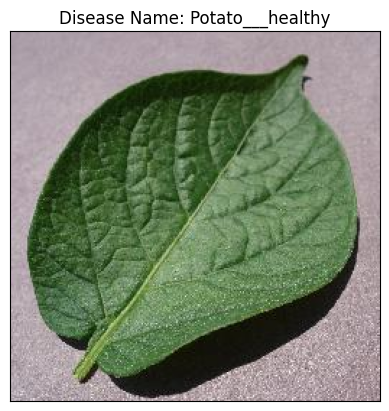

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Load the test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',  # Update with the correct path to your test dataset
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Evaluate the model on the test dataset
test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)


Found 33 files belonging to 1 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 708ms/step - accuracy: 0.0612 - loss: 1673.7164
Test accuracy: 0.06060606241226196


In [ ]:
# Calculate F1 Score
f1 = f1_score(Y_true, predicted_categories, average='weighted')  # Use 'macro' or 'micro' as needed
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.9581


Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

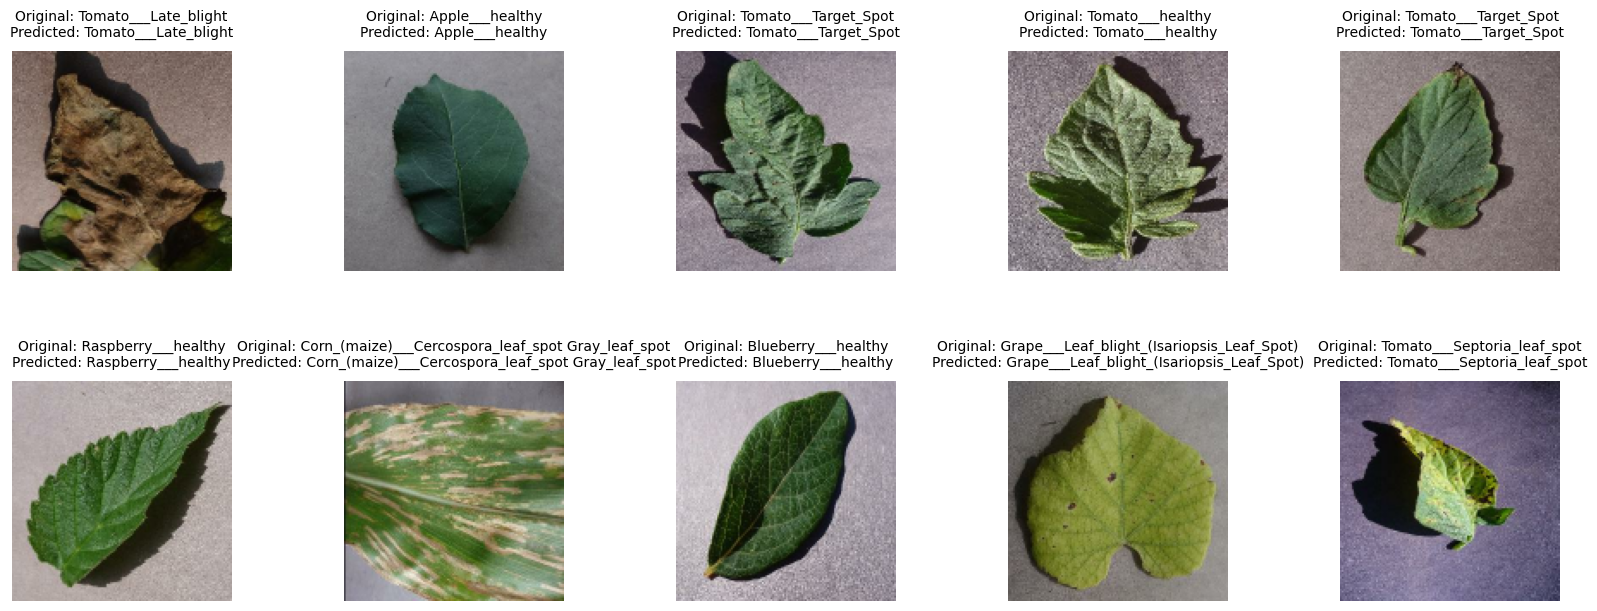

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)

# Get class names
class_names = validation_set.class_names
print(class_names)

# Get a batch of images and their labels
images, labels = validation_set.as_numpy_iterator().next()

# Make predictions on the batch
predictions = cnn.predict(images)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the original class indices
original_classes = np.argmax(labels, axis=1)

# Plot 10 images with their original and predicted labels
num_images = 10
plt.figure(figsize=(20, 20))  # Increase figure size for better visibility

for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].astype("uint8"))  # Convert the float values to uint8 for proper visualization
    plt.title(f'Original: {class_names[original_classes[i]]}\nPredicted: {class_names[predicted_classes[i]]}',
              fontsize=10, pad=10)  # Adjust font size to 10 for smaller text
    plt.axis('off')

# Adjust spacing between images
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase spacing
plt.savefig('CNN Model Test',dpi=700)
plt.show()
